In [2]:
# #!/usr/bin/env python3

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import pandas as pd 
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
recoveries_df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [4]:
cols = recoveries_df.keys()
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = recoveries.keys()

In [5]:
def get_recovery_info(country_name):
    country_recoveries = []  
    
    for i in dates:
    	country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())

    return country_recoveries

In [6]:
def recovery_plot(x, y, country):

    months = []

    for date in dates:
        month = re.findall(r"([0-9]{1,2}/1/20)", date)
        if month:
            months.append(month[0])

    plt.figure(figsize = (15, 8))
    plt.plot(x, y)
    plt.title('{} Recoveries Over Time'.format(country), size = 25)
    plt.xlabel('Date', size = 20)
    plt.ylabel('# of Recoveries', size = 20)
    plt.yticks(size = 10)
    plt.xticks(months, size = 10)

    plt.show()  

In [7]:
def recovery_visualization(country_name):
    country_recoveries = get_recovery_info(country_name)

    recovery_plot(dates, country_recoveries, country_name)

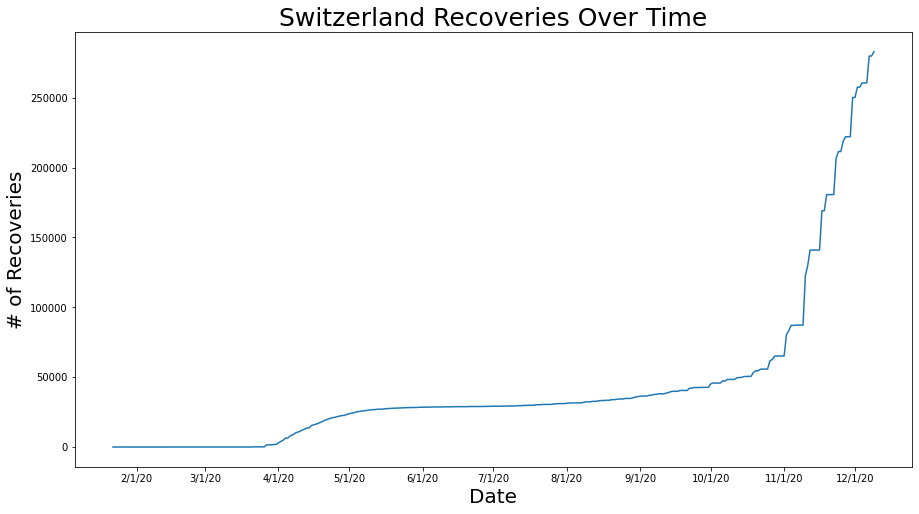

In [8]:
recovery_visualization("Switzerland")